In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('C:/Users/swaya/Downloads/crop_yeild_dataset/crop yield data sheet.xlsx')
df.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0


In [3]:
df.describe(include='all')

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
count,99.000000,99.000000,100.0,99.000000,99.000000,99.000000,99.000000
unique,NaN,NaN,14.0,NaN,NaN,NaN,NaN
top,NaN,NaN,28.0,NaN,NaN,NaN,NaN
freq,NaN,NaN,20.0,NaN,NaN,NaN,NaN
mean,849.797980,67.808081,NaN,70.737374,21.131313,18.060606,9.050505
std,400.042676,10.028202,NaN,6.677079,1.951695,1.817254,1.965902
min,400.000000,50.000000,NaN,59.000000,18.000000,15.000000,5.500000
25%,450.000000,60.000000,NaN,65.000000,19.500000,16.000000,7.000000
50%,1150.000000,70.000000,NaN,71.000000,21.000000,19.000000,9.000000
75%,1237.500000,77.000000,NaN,77.000000,23.000000,19.000000,11.000000


In [4]:
print(df.isnull().sum())

Rain Fall (mm)    10
Fertilizer        10
Temperatue         9
Nitrogen (N)      10
Phosphorus (P)    10
Potassium (K)     10
Yeild (Q/acre)    10
dtype: int64


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rain Fall (mm),99.0,849.797980,400.042676,400.0,450.0,1150.0,1237.5,1300.0
Fertilizer,99.0,67.808081,10.028202,50.0,60.0,70.0,77.0,80.0
Nitrogen (N),99.0,70.737374,6.677079,59.0,65.0,71.0,77.0,80.0
Phosphorus (P),99.0,21.131313,1.951695,18.0,19.5,21.0,23.0,25.0
Potassium (K),99.0,18.060606,1.817254,15.0,16.0,19.0,19.0,22.0
Yeild (Q/acre),99.0,9.050505,1.965902,5.5,7.0,9.0,11.0,12.0


In [6]:
df = df.dropna()

In [7]:
df.corr()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
Rain Fall (mm),1.000000,0.890318,-0.967291,0.875808,0.776814,0.810893,0.886721
Fertilizer,0.890318,1.000000,-0.864742,0.909786,0.816710,0.762152,0.833823
Temperatue,-0.967291,-0.864742,1.000000,-0.846513,-0.780556,-0.779570,-0.892425
Nitrogen (N),0.875808,0.909786,-0.846513,1.000000,0.778651,0.808640,0.879056
Phosphorus (P),0.776814,0.816710,-0.780556,0.778651,1.000000,0.748642,0.800094
Potassium (K),0.810893,0.762152,-0.779570,0.808640,0.748642,1.000000,0.856010
Yeild (Q/acre),0.886721,0.833823,-0.892425,0.879056,0.800094,0.856010,1.000000


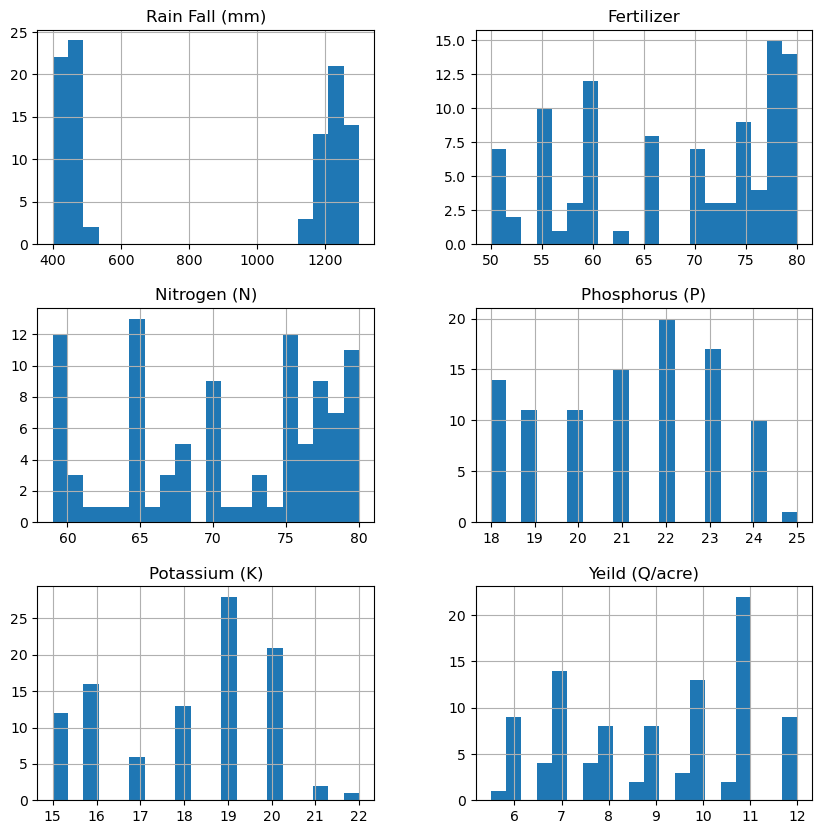

In [8]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['Rain Fall (mm)', 'Fertilizer', 'Temperatue', 'Nitrogen (N)', 'Phosphorus (P)', 'Potassium (K)']],
    df['Yeild (Q/acre)'],
    test_size=0.3,
    random_state=42)

In [11]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train, y_train)
y_pred_svr = svr_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_svr)
svr_score = svr_regressor.score(X_test, y_test)
print('Mean Squared Error:', mse)
print("Support Vector Regression R-squared score: ", svr_score)

Mean Squared Error: 0.8126617006915908
Support Vector Regression R-squared score:  0.8287230184128723
